# Cluster Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/home/tom/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/tom/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Reading in and Cleaning Data

In [3]:
df_pre_processing_clusters = pd.read_csv('/home/tom/Documents/ParlayPlay/Cluster_EDA/labelled_new_bins_22_02.csv') 

In [4]:
df_pre_processing_clusters = df_pre_processing_clusters.drop(columns= ["Unnamed: 0"])

### Discover the inactive clusters via observing contest count per cluster

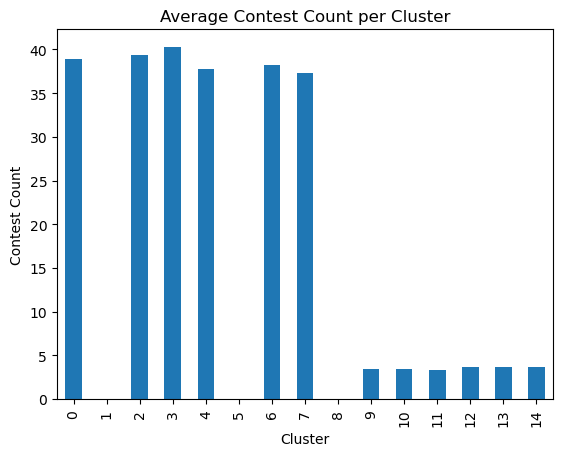

In [34]:
df_pre_processing_clusters[['AE_Label','contest_count']].groupby('AE_Label').mean().plot(kind='bar')
plt.title("Average Contest Count per Cluster")
plt.legend().remove()
plt.xlabel("Cluster")
plt.ylabel("Contest Count")
plt.show()

### Inactive Clusters

So we can see that clusters 1, 5, 8 are the inactive clusters. 

In [32]:
df_pre_processing_clusters['AE_Label'].value_counts()

AE_Label
4     13075
6     10443
0      9122
2      8878
1      8005
3      7488
5      6424
7      6193
8      5862
9      5013
10     3773
11     3680
13     1690
12     1309
14     1293
Name: count, dtype: int64

We can now find the percentage of inactive clusters in the whole user base:

In [9]:
sum_of_inactive_clustered_users = (df_pre_processing_clusters['AE_Label'].value_counts()[1]
                                 + df_pre_processing_clusters['AE_Label'].value_counts()[5]
                                 + df_pre_processing_clusters['AE_Label'].value_counts()[8])

In [12]:
percentage_of_inactive_clustered_users = 100*(sum_of_inactive_clustered_users / 
                                          df_pre_processing_clusters['AE_Label'].value_counts().sum())

In [13]:
print(percentage_of_inactive_clustered_users)

21.99614083774174


So we see that roughly 22% of users belong to inactive clusters. This fits with our initial data analysis. 

To better visualise this for the essay, we put this into a pie chart. 

In [19]:
def is_active(x):
    if x in [1, 5, 8]:
        return "Inactive"
    else:
        return "Active"

In [20]:
df_pre_processing_clusters['is_active'] = df_pre_processing_clusters['AE_Label'].apply(lambda x: is_active(x))

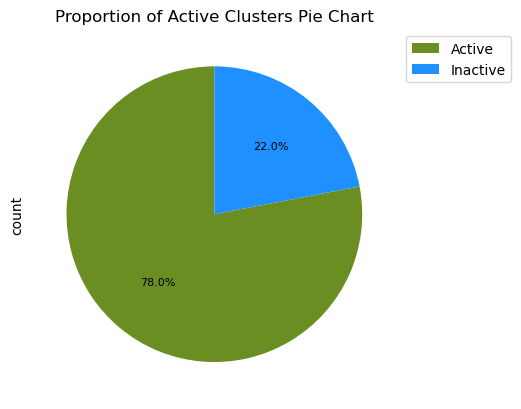

In [21]:
df_pre_processing_clusters['is_active'].value_counts().plot(kind='pie', labels = None, colors = ["olivedrab", "dodgerblue"], startangle=90, legend =True, textprops={'fontsize': 8}, autopct='%1.1f%%')
plt.legend(labels = df_pre_processing_clusters['is_active'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of Active Clusters Pie Chart')
plt.show()

### Engaged Active Clusters

From the contest count graph, we see there is a split in levels of engagement of active users. Clusters 0, 2, 3, 4, 6, 7 represent high engagement whilst Clusters 9, 10, 11, 12, 13, 14 all show a low level of engagement. 

In [22]:
def is_engaged(x):
    if x in [0, 2, 3, 4, 6, 7]:
        return "Engaged"
    elif x in [9, 10, 11, 12, 13, 14]:
        return "Not Engaged"
    else:
        return "N/A"
    

In [23]:
df_pre_processing_clusters['is_engaged'] = df_pre_processing_clusters['AE_Label'].apply(lambda x: is_engaged(x))

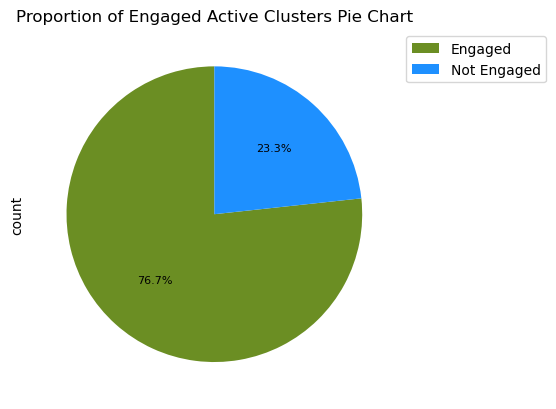

In [24]:
df_pre_processing_clusters[df_pre_processing_clusters['is_engaged'] != "N/A"]['is_engaged'].value_counts().plot(kind='pie', labels = None, colors = ["olivedrab", "dodgerblue"], startangle=90, legend =True, textprops={'fontsize': 8}, autopct='%1.1f%%')
plt.legend(labels = df_pre_processing_clusters[df_pre_processing_clusters['is_engaged'] != "N/A"]['is_engaged'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of Engaged Active Clusters Pie Chart')
plt.show()

### Active users FDA Analysis

We see this split transcending multiple different features: one striking example being FDA.

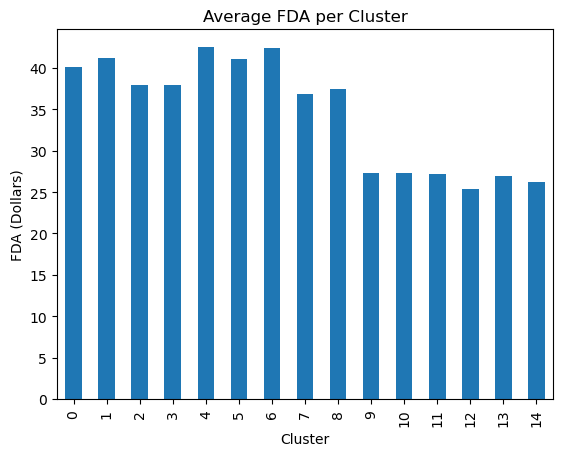

In [25]:
df_pre_processing_clusters[['AE_Label','fda']].groupby('AE_Label').mean().plot(kind='bar')
plt.title("Average FDA per Cluster")
plt.legend().remove()
plt.xlabel("Cluster")
plt.ylabel("FDA (Dollars)")
plt.show()

We see that on average the engaged users deposit roughly 30% more than the other active users. 

In [28]:
av_engaged_fda = df_pre_processing_clusters[df_pre_processing_clusters['is_engaged'] != "N/A"].groupby(['is_engaged']).fda.mean()['Engaged']

av_not_engaged_fda = df_pre_processing_clusters[df_pre_processing_clusters['is_engaged'] != "N/A"].groupby(['is_engaged']).fda.mean()['Not Engaged']

In [30]:
av_engaged_fda

40.08650519031142

In [31]:
av_not_engaged_fda

27.019035684449218

In [37]:
fda_percentage_decrease_from_engaged_to_not_engaged = (1 - av_not_engaged_fda / av_engaged_fda)*100

In [38]:
print(fda_percentage_decrease_from_engaged_to_not_engaged)

32.59817597923329


### LTV Cluster Analysis

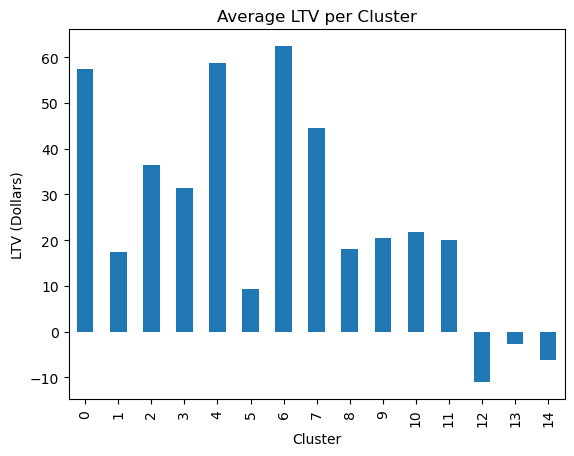

In [39]:
df_pre_processing_clusters[['AE_Label','net_cash']].groupby('AE_Label').mean().plot(kind='bar')
plt.title("Average LTV per Cluster")
plt.legend().remove()
plt.xlabel("Cluster")
plt.ylabel("LTV (Dollars)")
plt.show()

Clusters of interest here are 12, 13, 14, as they all show negative LTV. We now analyse how important a group these clusters are.

In [43]:
total_num_neg_ltv_clusters = (df_pre_processing_clusters['AE_Label'].value_counts()[12]
                             +df_pre_processing_clusters['AE_Label'].value_counts()[13]
                             +df_pre_processing_clusters['AE_Label'].value_counts()[14])

In [44]:
print(total_num_neg_ltv_clusters)

4292


In [47]:
neg_ltv_perc_of_all_users = 100*(total_num_neg_ltv_clusters / df_pre_processing_clusters['AE_Label'].value_counts().sum())

In [48]:
print(neg_ltv_perc_of_all_users)

4.652675396756569


So we see that the negative LTV clusters make up around 5% of the total user base (over 4000 users). 

Let's analyse other features to see if we identify any patterns that could be useful.

### Analysis of MP Contests

We noticed that, of the "Not Engaged" active clusters, those with a negative LTV (12, 13, 14) had increased levels of activity for MP constests. 

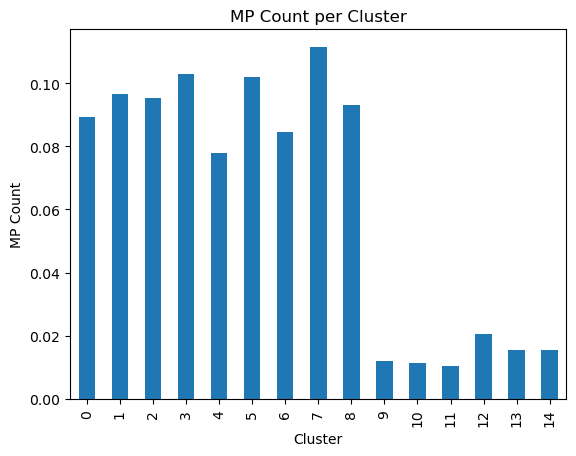

In [49]:
df_pre_processing_clusters[['AE_Label','mp_count']].groupby('AE_Label').mean().plot(kind='bar')
plt.title("MP Count per Cluster")
plt.legend().remove()
plt.xlabel("Cluster")
plt.ylabel("MP Count")
plt.show()

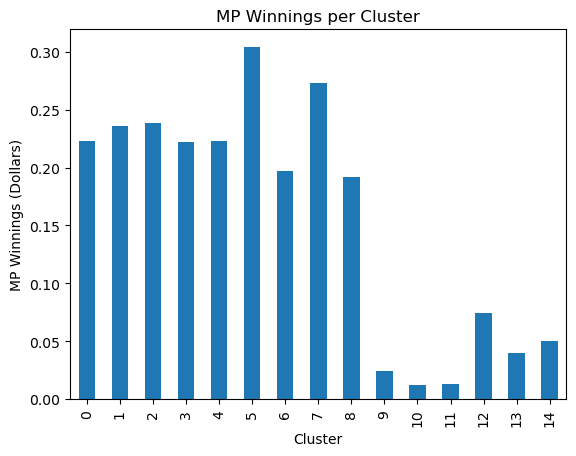

In [53]:
df_pre_processing_clusters[['AE_Label','mp_winnings']].groupby('AE_Label').mean().plot(kind='bar')
plt.title("MP Winnings per Cluster")
plt.legend().remove()
plt.xlabel("Cluster")
plt.ylabel("MP Winnings (Dollars)")
plt.show()

Unsurprisingly, Clusters 12, 13, 14 also have higher average winnings from these contests. However, of particular note from this graph is the peak at Cluster 5. Recall that this cluster is inactive. Whilst it would make sense that users who place no official contests (which we deemed as inactive) but still wanted to engage with the platform would look for free alternatives, just how high this peak is calls for further investigation. 

We then analysed the Huddle contests to see if any of these trends appear here too.

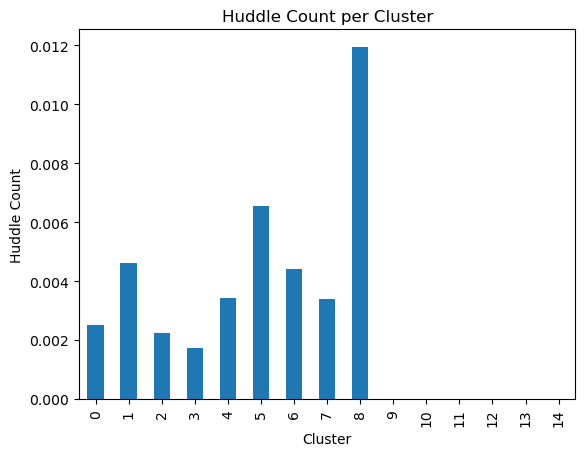

In [51]:
df_pre_processing_clusters[['AE_Label','huddle_count']].groupby('AE_Label').mean().plot(kind='bar')
plt.title("Huddle Count per Cluster")
plt.legend().remove()
plt.xlabel("Cluster")
plt.ylabel("Huddle Count")
plt.show()

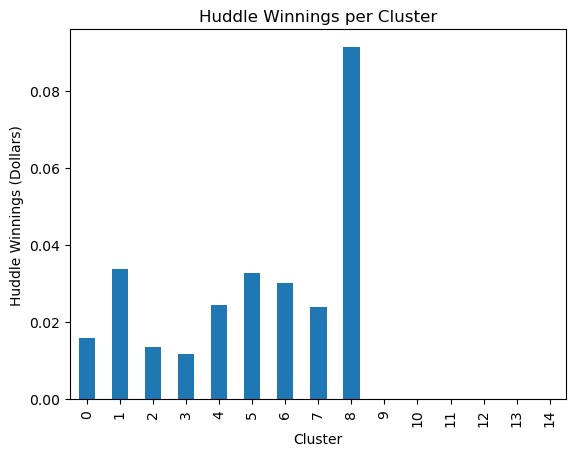

In [54]:
df_pre_processing_clusters[['AE_Label','huddle_winnings']].groupby('AE_Label').mean().plot(kind='bar')
plt.title("Huddle Winnings per Cluster")
plt.legend().remove()
plt.xlabel("Cluster")
plt.ylabel("Huddle Winnings (Dollars)")
plt.show()

Surprisingly, we see a huge spike for Cluster 8 (another inactive cluster). This warrants further analysis, some of which is discussed in the essay. 

### Inactive Users Potential

Finally, we explore how big the inactive clusters market could be for ParlayPlay and how the Huddle and MP graphs above indicate a potential for further development. 

We saw above that inactive clusters make up 22% of the user base. We now explore their impact on LTV.

In [62]:
active_cluster_total_ltv = df_pre_processing_clusters.groupby(['is_active']).net_cash.sum()['Active']

inactive_cluster_total_ltv = df_pre_processing_clusters.groupby(['is_active']).net_cash.sum()['Inactive']

In [64]:
active_cluster_total_ltv

3013658.44

In [66]:
inactive_cluster_total_ltv

305454.0

In [67]:
inactive_perc_of_total_ltv = 100*(inactive_cluster_total_ltv / df_pre_processing_clusters.net_cash.sum())

In [68]:
inactive_perc_of_total_ltv

9.202881960817212

So we see inactive clusters make up nearly 10% of the total LTV of all users.